In [1]:
import plotly
import pandas as pd
import numpy as np
from pathlib import Path
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline
from IPython.core.display import HTML
import statsmodels.api as sm
import statsmodels.formula.api as smf
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import numpy as np
import os
import chart_studio
import itertools
from collections import Counter

In [2]:
path_to_download_folder = str(os.path.join(Path.home(), "Downloads"))

In [3]:
admit = pd.read_csv(os.path.join(path_to_download_folder, "Admit.csv"))
patients = pd.read_csv(os.path.join(path_to_download_folder, "Patient.csv"))
diagnosis = pd.read_csv(os.path.join(path_to_download_folder, "Diagnosis (2).csv"))

In [4]:
admit.head()

row_id  subject_id  hadm_id                admittime  \
0      21          22   165315  2196-04-09 12:26:00.000   
1      22          23   152223  2153-09-03 07:15:00.000   
2      23          23   124321  2157-10-18 19:34:00.000   
3      24          24   161859  2139-06-06 16:14:00.000   
4      25          25   129635  2160-11-02 02:06:00.000   

                 dischtime deathtime admission_type  \
0  2196-04-10 15:54:00.000       NaN      EMERGENCY   
1  2153-09-08 19:10:00.000       NaN       ELECTIVE   
2  2157-10-25 14:00:00.000       NaN      EMERGENCY   
3  2139-06-09 12:48:00.000       NaN      EMERGENCY   
4  2160-11-05 14:55:00.000       NaN      EMERGENCY   

          admission_location         discharge_location insurance language  \
0       EMERGENCY ROOM ADMIT  DISC-TRAN CANCER/CHLDRN H   Private      NaN   
1  PHYS REFERRAL/NORMAL DELI           HOME HEALTH CARE  Medicare      NaN   
2  TRANSFER FROM HOSP/EXTRAM           HOME HEALTH CARE  Medicare     ENGL   
3  TRANSFER FROM HOSP/EXTRAM                       HOME   Private      NaN   
4       EMERGENCY ROOM ADMIT                       HOME   Private      NaN   

            religion marital_status ethnicity                edregtime  \
0       UNOBTAINABLE        MARRIED     WHITE  2196-04-09 10:06:00.000   
1           CATHOLIC        MARRIED     WHITE                      NaN   
2           CATHOLIC        MARRIED     WHITE                      NaN   
3  PROTESTANT QUAKER         SINGLE     WHITE                      NaN   
4       UNOBTAINABLE        MARRIED     WHITE  2160-11-02 01:01:00.000   

                 edouttime                                          diagnosis  \
0  2196-04-09 13:24:00.000                            BENZODIAZEPINE OVERDOSE   
1                      NaN  CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...   
2                      NaN                                         BRAIN MASS   
3                      NaN                     INTERIOR MYOCARDIAL INFARCTION   
4  2160-11-02 04:27:00.000                            ACUTE CORONARY SYNDROME   

   hospital_expire_flag  has_chartevents_data  
0                     0                     1  
1                     0                     1  
2                     0                     1  
3                     0                     1  
4                     0                     1

In [5]:
patients.head()

row_id  subject_id gender                      dob  \
0     234         249      F  2075-03-13 00:00:00.000   
1     235         250      F  2164-12-27 00:00:00.000   
2     236         251      M  2090-03-15 00:00:00.000   
3     237         252      M  2078-03-06 00:00:00.000   
4     238         253      F  2089-11-26 00:00:00.000   

                       dod                 dod_hosp dod_ssn  expire_flag  
0                      NaN                      NaN     NaN            0  
1  2188-11-22 00:00:00.000  2188-11-22 00:00:00.000     NaN            1  
2                      NaN                      NaN     NaN            0  
3                      NaN                      NaN     NaN            0  
4                      NaN                      NaN     NaN            0

Check to find the top 10 most common reasons for ER admission.

In [6]:
admits = admit['diagnosis'].value_counts()

In [7]:
admits.head(10)

NEWBORN                                                      7823
PNEUMONIA                                                    1566
SEPSIS                                                       1184
CONGESTIVE HEART FAILURE                                      928
CORONARY ARTERY DISEASE                                       840
CHEST PAIN                                                    778
INTRACRANIAL HEMORRHAGE                                       713
ALTERED MENTAL STATUS                                         712
GASTROINTESTINAL BLEED                                        686
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA     583
Name: diagnosis, dtype: int64

In [8]:
admit['ethnicity'].value_counts()

WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85
WHITE - OT

Take a look at the top admit reasons for each race.

In [9]:
def ethnicity_admit(admit, ethnicity):
    ethnicity = admit[admit['ethnicity'] ==  ethnicity].groupby(['diagnosis']).size()
    ethnicity = ethnicity.reset_index()
    ethnicity["Percentage"] = ethnicity[0]/ethnicity[0].sum()
    ethnicity = ethnicity.sort_values(by = "Percentage", ascending= False).head(5)
    
    return(ethnicity)


In [10]:
ethnicity_admit(admit, 'WHITE')

diagnosis     0  Percentage
7683                    NEWBORN  4755    0.116046
8365                  PNEUMONIA  1166    0.028456
10149                    SEPSIS   864    0.021086
3113   CONGESTIVE HEART FAILURE   614    0.014985
2522                 CHEST PAIN   575    0.014033

In [11]:
ethnicity_admit(admit, "BLACK/AFRICAN AMERICAN")

diagnosis    0  Percentage
1151                   NEWBORN  865    0.159037
419   CONGESTIVE HEART FAILURE  176    0.032359
499      DIABETIC KETOACIDOSIS  165    0.030336
1234                 PNEUMONIA  164    0.030153
1504                    SEPSIS  137    0.025188

In [12]:
ethnicity_admit(admit, "ASIAN")

diagnosis    0  Percentage
318                  NEWBORN  715    0.474453
339                PNEUMONIA   38    0.025216
217       HYPERBILIRUBINEMIA   31    0.020571
408                   SEPSIS   19    0.012608
247  INTRACRANIAL HEMORRHAGE   15    0.009954

In [13]:
ethnicity_admit(admit, "UNKNOWN/NOT SPECIFIED")

diagnosis    0  Percentage
1183                                            NEWBORN  437    0.096639
555                             CORONARY ARTERY DISEASE  185    0.040911
625   CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...  115    0.025431
433                                     CHEST PAIN\CATH   71    0.015701
616                        CORONARY ARTERY DISEASE\CATH   68    0.015038

Looking at the top 20 diseases by length of stay (in days).

In [14]:
admit['staylength']= pd.to_datetime(admit['dischtime']) - pd.to_datetime(admit['admittime'])

In [15]:
admit['staylength'] = pd.to_timedelta(admit.staylength).dt.total_seconds()
# Convert seconds to days
admit['staylength'] = admit['staylength']/(24*60*60)

In [16]:
average_stay = admit[['staylength', 'diagnosis']].groupby(['diagnosis']).mean()
average_stay.sort_values(by = 'staylength', ascending  = False).head(20)

staylength
diagnosis                                                     
CROHN'S DISEASE;ABDOMINAL FISTULA                   294.660417
ASPIRATION; FAILURE TO THRIVE                       191.422917
CHRONIC LYMPHOCYTIC LEUKEMIA\BONE MARROW TRANSP...  169.187500
L THIGH FLUID COLLECTION                            166.906944
AMC;FEVER                                           164.365972
S/P LIVER TX-NAUSEA-VOMITING                        137.965278
APLASTIC ANEMIA;PANCYTOPENIA                        137.891667
PULMONARY EMBOLISM;SUBDURAL HEMATOMA                131.970833
ACUTE MYELOGENOUS LEUKEMIA;CHEMOTHERAPY             129.960417
MULTIPLE MYELOMA;FEVER;NEUTROPENIA                  129.035417
MYELODYSPLASIA;BONE MARROW TRANSPLANT/SDA           126.270833
RT CEREBELLAR BLEED                                 125.489583
FACIAL NUMBNESS                                     123.984722
LARGE ABDOMINAL FISTULA                             123.687500
ELEVATED WHITE BLOOD COUNT                          118.701389
SMALL BOWEL FISTULA                                 115.968750
TRACHEAL BRONCHIAL MALACIA\ BRONCHOSCOPY W/"Y" ...  107.000000
INFECTED LEG                                        106.831944
FOUND DOWN,SUB DURAL HEMATOMA                       104.179167
UTI;ABDOMINAL PAIN                                  102.802778

Load in the diagnosis data and look at the primary diagnoses.

In [17]:
diagnosis = pd.read_csv(os.path.join(path_to_download_folder, "diagnosis.csv"))

In [18]:
primary_diag = diagnosis[diagnosis['seq_num']==1]

In [19]:
primary_diag

row_id  subject_id  hadm_id  seq_num icd9_code  row_id.1 icd9_code.1  \
30          892         107   191941        1     99673     11632       99673   
31          892         107   191941        1     99673     11632       99673   
32          892         107   191941        1     99673     11632       99673   
45          897         108   123552        1     41401      4374       41401   
51          903         109   102024        1     40301      4312       40301   
...         ...         ...      ...      ...       ...       ...         ...   
1341830  637056       96908   138027        1     53541      6103       53541   
1341831  637056       96908   138027        1     53541      6103       53541   
1341877  637072       96908   149629        1     25040      1680       25040   
1341878  637072       96908   149629        1     25040      1680       25040   
1341879  637072       96908   149629        1     25040      1680       25040   

                      short_title  \
30       Comp-ren dialys dev/grft   
31       Comp-ren dialys dev/grft   
32       Comp-ren dialys dev/grft   
45       Crnry athrscl natve vssl   
51         Mal hyp kid w cr kid V   
...                           ...   
1341830    Oth spf gastrt w hmrhg   
1341831    Oth spf gastrt w hmrhg   
1341877  DMII renl nt st uncntrld   
1341878  DMII renl nt st uncntrld   
1341879  DMII renl nt st uncntrld   

                                                long_title  row_id.2  ...  \
30       Other complications due to renal dialysis devi...       114  ...   
31       Other complications due to renal dialysis devi...       113  ...   
32       Other complications due to renal dialysis devi...       112  ...   
45       Coronary atherosclerosis of native coronary ar...       115  ...   
51       Hypertensive chronic kidney disease, malignant...       149  ...   
...                                                    ...       ...  ...   
1341830         Other specified gastritis, with hemorrhage     58009  ...   
1341831         Other specified gastritis, with hemorrhage     58008  ...   
1341877  Diabetes with renal manifestations, type II or...     58010  ...   
1341878  Diabetes with renal manifestations, type II or...     58009  ...   
1341879  Diabetes with renal manifestations, type II or...     58008  ...   

         insurance  language       religion marital_status  \
30        Medicare      ENGL       CATHOLIC      SEPARATED   
31        Medicare      ENGL       CATHOLIC      SEPARATED   
32         Private      ENGL       CATHOLIC        MARRIED   
45        Medicare       NaN       CATHOLIC        MARRIED   
51        Medicaid      ENGL  NOT SPECIFIED         SINGLE   
...            ...       ...            ...            ...   
1341830   Medicaid      ENGL       CATHOLIC        MARRIED   
1341831   Medicaid      ENGL       CATHOLIC        MARRIED   
1341877    Private      ENGL       CATHOLIC        MARRIED   
1341878   Medicaid      ENGL       CATHOLIC        MARRIED   
1341879   Medicaid      ENGL       CATHOLIC        MARRIED   

                      ethnicity                edregtime  \
30           HISPANIC OR LATINO  2122-05-14 12:29:00.000   
31           HISPANIC OR LATINO  2121-11-30 16:40:00.000   
32           HISPANIC OR LATINO                      NaN   
45                        WHITE                      NaN   
51       BLACK/AFRICAN AMERICAN  2142-08-28 16:12:00.000   
...                         ...                      ...   
1341830      HISPANIC OR LATINO  2145-02-02 19:33:00.000   
1341831      HISPANIC OR LATINO  2145-01-05 09:08:00.000   
1341877      HISPANIC OR LATINO  2145-09-04 05:57:00.000   
1341878      HISPANIC OR LATINO  2145-02-02 19:33:00.000   
1341879      HISPANIC OR LATINO  2145-01-05 09:08:00.000   

                       edouttime                              diagnosis  \
30       2122-05-14 20:53:00.000                         UPPER GI BLEED   
31       2121-11-30 19:57:00.000  HYPERKALEMIA;CON

Merge admit data with patient data.

In [20]:
merged_data = admit.merge(patients, on= 'subject_id', how='inner')

In [21]:
merged_data.head()

row_id_x  subject_id  hadm_id                admittime  \
0        21          22   165315  2196-04-09 12:26:00.000   
1        22          23   152223  2153-09-03 07:15:00.000   
2        23          23   124321  2157-10-18 19:34:00.000   
3        24          24   161859  2139-06-06 16:14:00.000   
4        25          25   129635  2160-11-02 02:06:00.000   

                 dischtime deathtime admission_type  \
0  2196-04-10 15:54:00.000       NaN      EMERGENCY   
1  2153-09-08 19:10:00.000       NaN       ELECTIVE   
2  2157-10-25 14:00:00.000       NaN      EMERGENCY   
3  2139-06-09 12:48:00.000       NaN      EMERGENCY   
4  2160-11-05 14:55:00.000       NaN      EMERGENCY   

          admission_location         discharge_location insurance  ...  \
0       EMERGENCY ROOM ADMIT  DISC-TRAN CANCER/CHLDRN H   Private  ...   
1  PHYS REFERRAL/NORMAL DELI           HOME HEALTH CARE  Medicare  ...   
2  TRANSFER FROM HOSP/EXTRAM           HOME HEALTH CARE  Medicare  ...   
3  TRANSFER FROM HOSP/EXTRAM                       HOME   Private  ...   
4       EMERGENCY ROOM ADMIT                       HOME   Private  ...   

  hospital_expire_flag has_chartevents_data staylength row_id_y gender  \
0                    0                    1   1.144444       19      F   
1                    0                    1   5.496528       20      M   
2                    0                    1   6.768056       20      M   
3                    0                    1   2.856944       21      M   
4                    0                    1   3.534028       22      M   

                       dob  dod  dod_hosp  dod_ssn  expire_flag  
0  2131-05-07 00:00:00.000  NaN       NaN      NaN            0  
1  2082-07-17 00:00:00.000  NaN       NaN      NaN            0  
2  2082-07-17 00:00:00.000  NaN       NaN      NaN            0  
3  2100-05-31 00:00:00.000  NaN       NaN      NaN            0  
4  2101-11-21 00:00:00.000  NaN       NaN      NaN            0  

[5 rows x 27 columns]

In [22]:
admit['ethnicity'].value_counts()

WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85
WHITE - OT

Admission location is the best predictor of time of stay. 

In [23]:
results = smf.ols('staylength ~ admission_location', data=admit).fit()


In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             staylength   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     75.40
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          2.16e-124
Time:                        13:56:53   Log-Likelihood:            -2.3214e+05
No. Observations:               58976   AIC:                         4.643e+05
Df Residuals:                   58967   BIC:                         4.644e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           5.5729      0.868      6.422      0.000       3.872       7.274
admission_location[T.CLINIC REFERRAL/PREMATURE]     5.8818      0.875      6.721      0.000       4.167       7.597
admission_location[T.EMERGENCY ROOM ADMIT]          4.2417      0.872      4.866      0.000       2.533       5.950
admission_location[T.HMO REFERRAL/SICK]            -0.0417      1.503     -0.028      0.978      -2.988       2.904
admission_location[T.PHYS REFERRAL/NORMAL DELI]     3.1160      0.874      3.567      0.000       1.404       4.828
admission_location[T.TRANSFER FROM HOSP/EXTRAM]     6.1840      0.878      7.042      0.000       4.463       7.905
admission_location[T.TRANSFER FROM OTHER HEALT]    15.7663      1.708      9.232      0.000      12.419      19.114
admission_location[T.TRANSFER FROM SKILLED NUR]     4.8569      1.147      4.234      0.000       2.609       7.105
admission_location[T.TRSF WITHIN THIS FACILITY]    -2.5303      5.610     -0.451      0.652     -13.527       8.466
==============================================================================
Omnibus:                    56007.654   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3260026.503
Skew:                           4.558   Prob(JB):                         0.00
Kurtosis:                      38.264   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
merged_data['dob'] = pd.to_datetime(merged_data['dob']).dt.date
merged_data['admittime'] = pd.to_datetime(merged_data['admittime']).dt.date
merged_data['age'] = merged_data.apply(lambda e: (e['admittime'] - e['dob']).days/365, axis=1)
merged_data['age'][merged_data['age']>300] = 89

<ipython-input-25-10d3dd7ed067>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['age'][merged_data['age']>300] = 89


In [26]:
merged_data.head()

row_id_x  subject_id  hadm_id   admittime                dischtime  \
0        21          22   165315  2196-04-09  2196-04-10 15:54:00.000   
1        22          23   152223  2153-09-03  2153-09-08 19:10:00.000   
2        23          23   124321  2157-10-18  2157-10-25 14:00:00.000   
3        24          24   161859  2139-06-06  2139-06-09 12:48:00.000   
4        25          25   129635  2160-11-02  2160-11-05 14:55:00.000   

  deathtime admission_type         admission_location  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          discharge_location insurance  ... has_chartevents_data staylength  \
0  DISC-TRAN CANCER/CHLDRN H   Private  ...                    1   1.144444   
1           HOME HEALTH CARE  Medicare  ...                    1   5.496528   
2           HOME HEALTH CARE  Medicare  ...                    1   6.768056   
3                       HOME   Private  ...                    1   2.856944   
4                       HOME   Private  ...                    1   3.534028   

  row_id_y gender         dob  dod dod_hosp  dod_ssn  expire_flag        age  
0       19      F  2131-05-07  NaN      NaN      NaN            0  64.969863  
1       20      M  2082-07-17  NaN      NaN      NaN            0  71.178082  
2       20      M  2082-07-17  NaN      NaN      NaN            0  75.304110  
3       21      M  2100-05-31  NaN      NaN      NaN            0  39.041096  
4       22      M  2101-11-21  NaN      NaN      NaN            0  58.989041  

[5 rows x 28 columns]

In [27]:
age_results = smf.ols('staylength ~ age*expire_flag + gender + admission_type', data=merged_data).fit()

In [28]:
age_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             staylength   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     108.9
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          2.66e-159
Time:                        13:56:55   Log-Likelihood:            -2.3206e+05
No. Observations:               58976   AIC:                         4.641e+05
Df Residuals:                   58968   BIC:                         4.642e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       8.9342      0.292     30.577      0.000       8.361       9.507
gender[T.M]                     0.1446      0.103      1.405      0.160      -0.057       0.346
admission_type[T.EMERGENCY]     0.7776      0.155      5.011      0.000       0.473       1.082
admission_type[T.NEWBORN]       2.4515      0.315      7.788      0.000       1.835       3.068
admission_type[T.URGENT]        2.8812      0.368      7.830      0.000       2.160       3.602
age                            -0.0125      0.004     -3.094      0.002      -0.020      -0.005
expire_flag                     6.2653      0.446     14.038      0.000       5.391       7.140
age:expire_flag                -0.0576      0.007     -8.758      0.000      -0.071      -0.045
==============================================================================
Omnibus:                    55219.209   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3126884.423
Skew:                           4.460   Prob(JB):                         0.00
Kurtosis:                      37.538   Cond. No.                         727.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Build graph to show hospital stay times by various demographics.

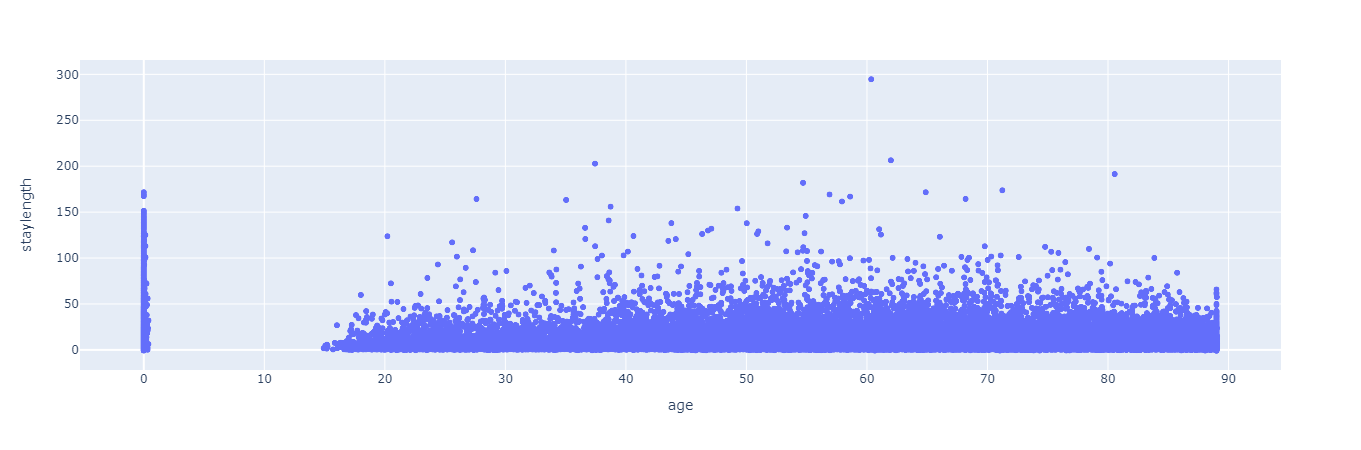

In [29]:
px.scatter(merged_data, 'age','staylength')

Most common primary diagnoses.

In [30]:
primary_diagnosis = diagnosis[diagnosis['seq_num']==1]

In [31]:
grouped = primary_diagnosis.groupby(by='short_title').size().reset_index(name='counts').sort_values(by='counts', ascending=False)[:10]

In [32]:
grouped.head()

short_title  counts
2325            Septicemia NOS    4578
731   Crnry athrscl natve vssl    4545
2342  Single lb in-hosp w/o cs    3697
158   Acute respiratry failure    3205
2341    Single lb in-hosp w cs    2810

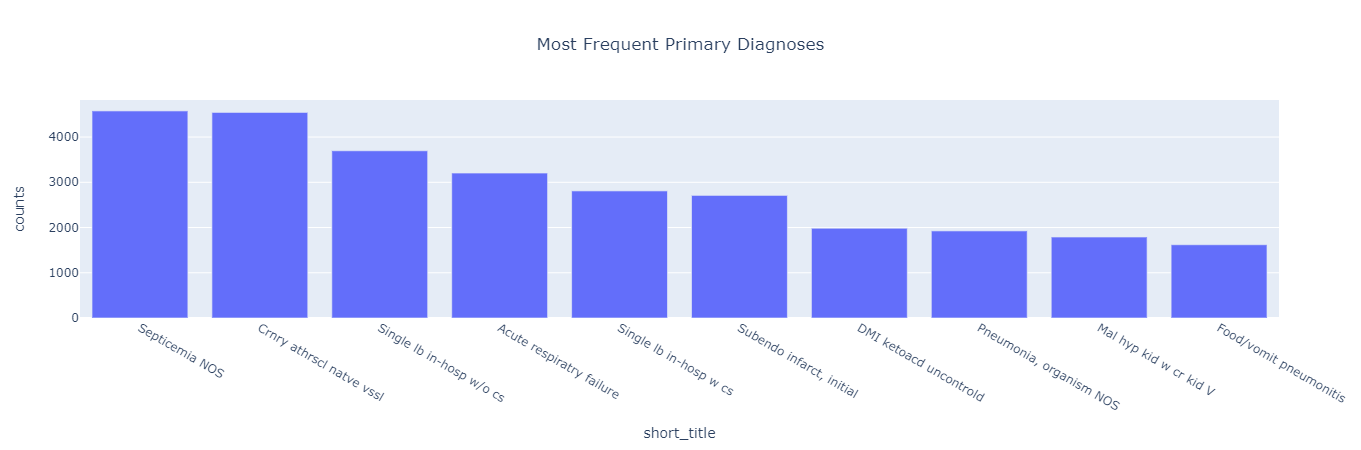

In [33]:
grad_bar = px.bar(grouped, 'short_title', 'counts', title = 'Most Frequent Primary Diagnoses')
grad_bar.update_layout(title_x = .5)
grad_bar.show()

Do different races have different ages?

In [34]:
age_race = merged_data.groupby(['ethnicity']).mean('age').reset_index().sort_values(by='age', ascending=False)

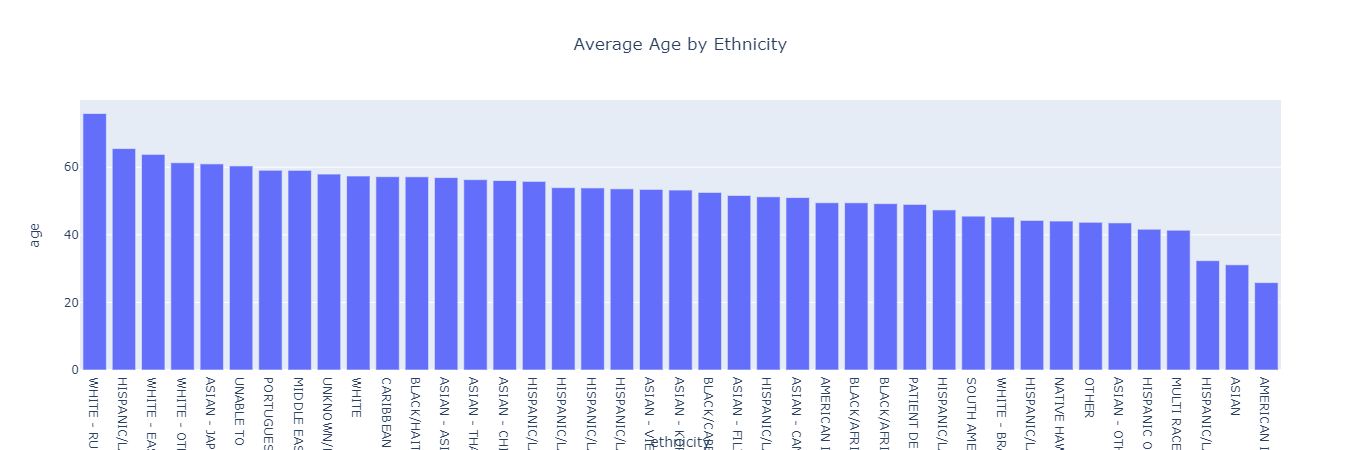

In [35]:
grad_bar = px.bar(age_race, 'ethnicity', 'age', title = 'Average Age by Ethnicity')
grad_bar.update_layout(title_x = .5)
grad_bar.show()

Do older people die at a higher rate?

In [36]:
death_age = merged_data.groupby(['expire_flag']).mean('age').reset_index()

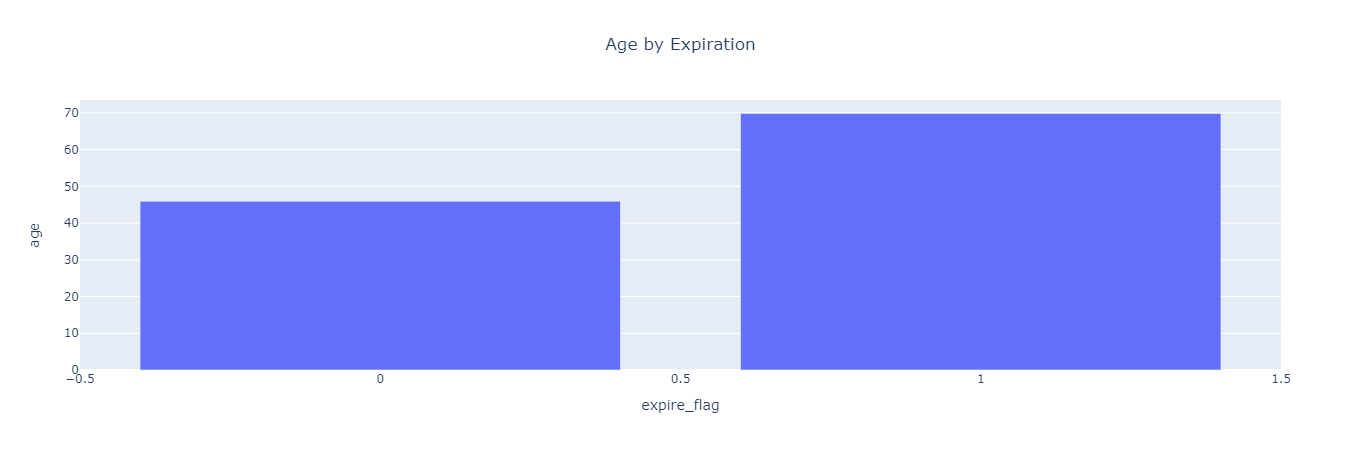

In [37]:
expire_bar = px.bar(death_age, 'expire_flag', 'age', title = 'Age by Expiration')
expire_bar.update_layout(title_x = .5)
expire_bar.show()

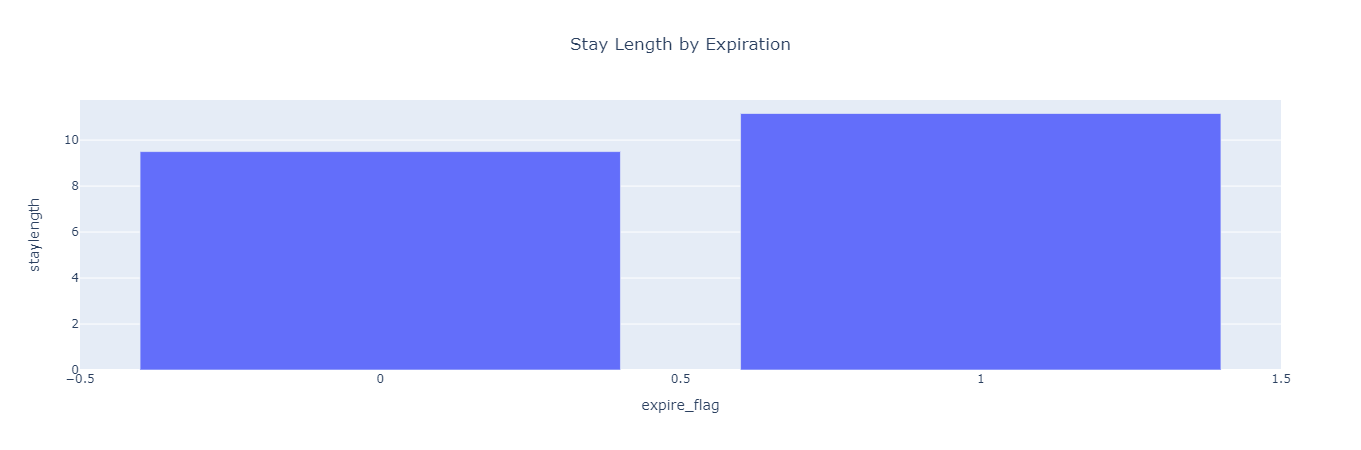

In [38]:
expire_bar = px.bar(death_age, 'expire_flag', 'staylength', title = 'Stay Length by Expiration')
expire_bar.update_layout(title_x = .5)
expire_bar.show()

In [39]:
diagnosis_matrix = diagnosis[['subject_id', 'short_title', 'seq_num']]

In [40]:
top30 = diagnosis_matrix['short_title'].value_counts()[:30].index.tolist()

Filter to only get the top 30 diagnoses.

In [53]:
subset_matrix = diagnosis_matrix[diagnosis_matrix['short_title'].isin(top30)]

In [54]:
subset_matrix = subset_matrix.groupby('subject_id')['short_title'].apply(','.join).reset_index()

In [55]:
diagnosis_list = subset_matrix['short_title'].to_list()

In [69]:
text_data = []
for i in diagnosis_list:
    text_data.append(i.split(','))

In [72]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
 
 
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index
 
# Create one list using many lists
data = list(itertools.chain.from_iterable(text_data))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)

In [74]:
import seaborn as sns; sns.set_theme()
import networkx as nx

In [76]:
G=nx.from_numpy_matrix(data_matrix.to_numpy())

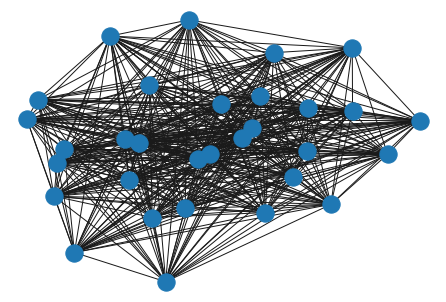

In [84]:
nx.draw(G, with_labels = False)

In [88]:
data_matrix2 = data_matrix.stack()
data_matrix2 = data_matrix2[data_matrix2 >= 1].rename_axis(('source', 'target')).reset_index(name='weight')
print(data_matrix2)

                      source                    target  weight
0    Depressive disorder NEC   Depressive disorder NEC  5611.0
1    Depressive disorder NEC  Urin tract infection NOS    79.0
2    Depressive disorder NEC    Old myocardial infarct    45.0
3    Depressive disorder NEC   Ac posthemorrhag anemia    62.0
4    Depressive disorder NEC    Hyperlipidemia NEC/NOS   368.0
..                       ...                       ...     ...
895                 Acidosis   Pure hypercholesterolem    59.0
896                 Acidosis                   CHF NOS   211.0
897                 Acidosis  Acute kidney failure NOS   945.0
898                 Acidosis          Hypertension NOS   206.0
899                 Acidosis                  Acidosis  5423.0

[900 rows x 3 columns]


In [89]:
G = nx.from_pandas_edgelist(data_matrix2,  edge_attr=True)

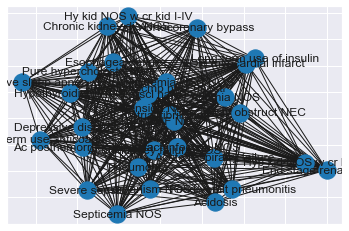

In [99]:
nx.draw_networkx(G)

In [100]:
data_matrix.to_csv('diagnosis_data')